#Exploratory Data Analysis on Indian Premier League

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Dataset 1 (Matches)

In [2]:
#importing first dataset
matches = pd.read_csv("/content/matches.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

###Dataset 2 (Deliveries)

In [6]:
#importing 2nd dataset
deliveries = pd.read_csv("/content/deliveries.csv")

In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
deliveries.shape

(179078, 21)

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

###Visualization of Data

**Number of matches each season**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

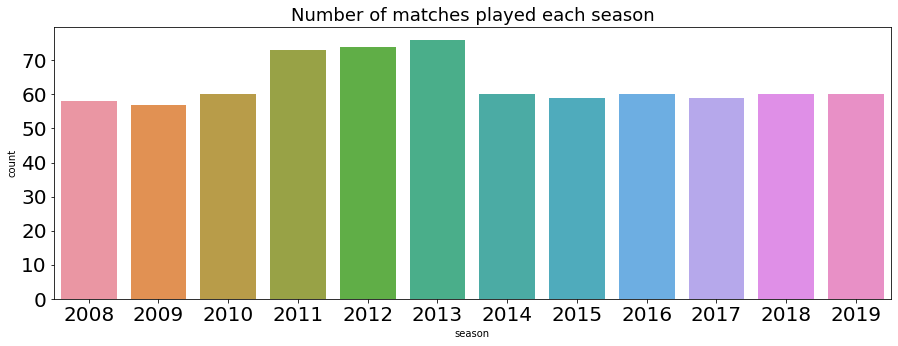

In [10]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18)
plt.xticks(size = 20)
plt.yticks(size = 20)

The average number of matches every year is between 58-60 but we can see a spike in three years where the matches are more than 70 (2011-2013)

**Number of teams each season**

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

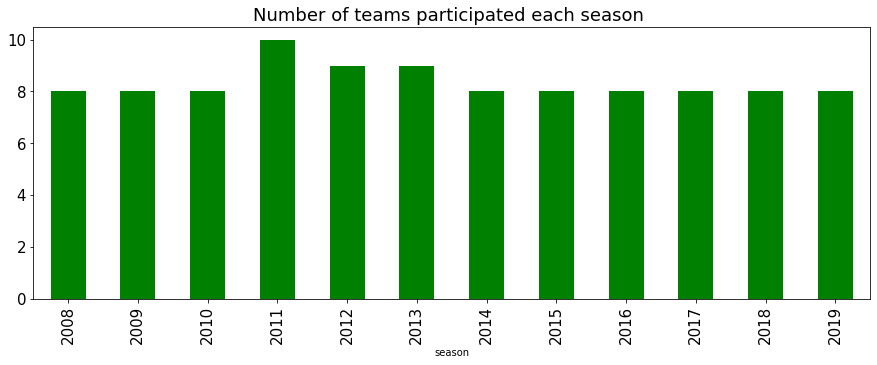

In [11]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5),color = 'green')
plt.title("Number of teams participated each season ",fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

The number of teams every year is 8 except for 2011 (10 teams), 2012 and 2013 (9 teams each) 

*This explains why there were more number of matches in these 3 years*

**Number of Matches at each Venue**

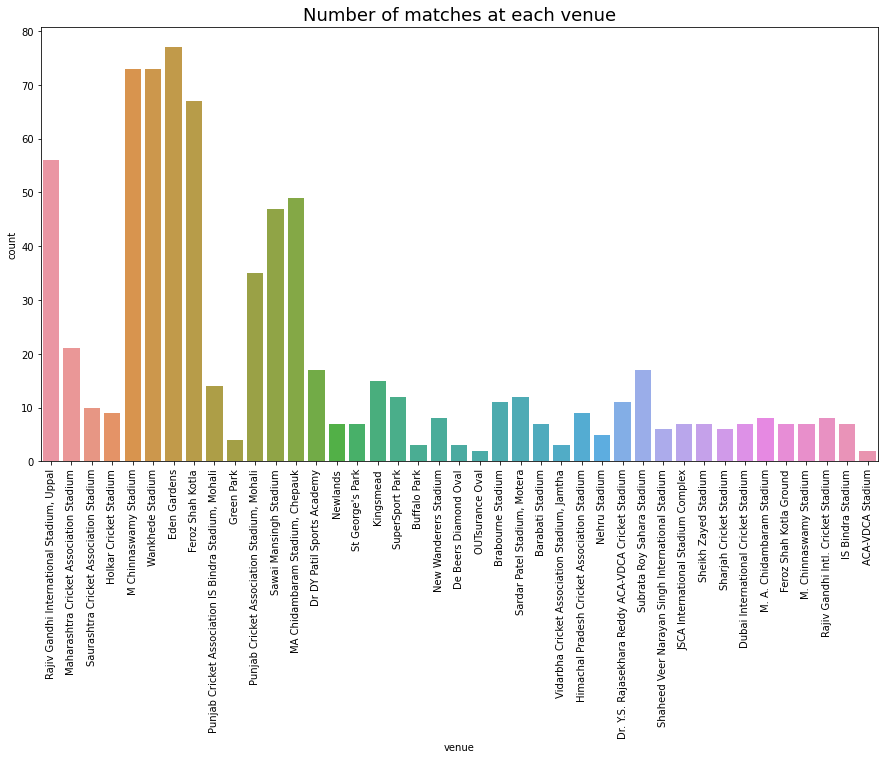

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='venue', data=matches)
plt.xticks(rotation='vertical')
plt.title("Number of matches at each venue",fontsize=18)
plt.show()

Eden Gardens has hosted the most number of matches, followed by Wankhede Stadium and M Chinmaswamy stadium

**Number of matches played by each team**

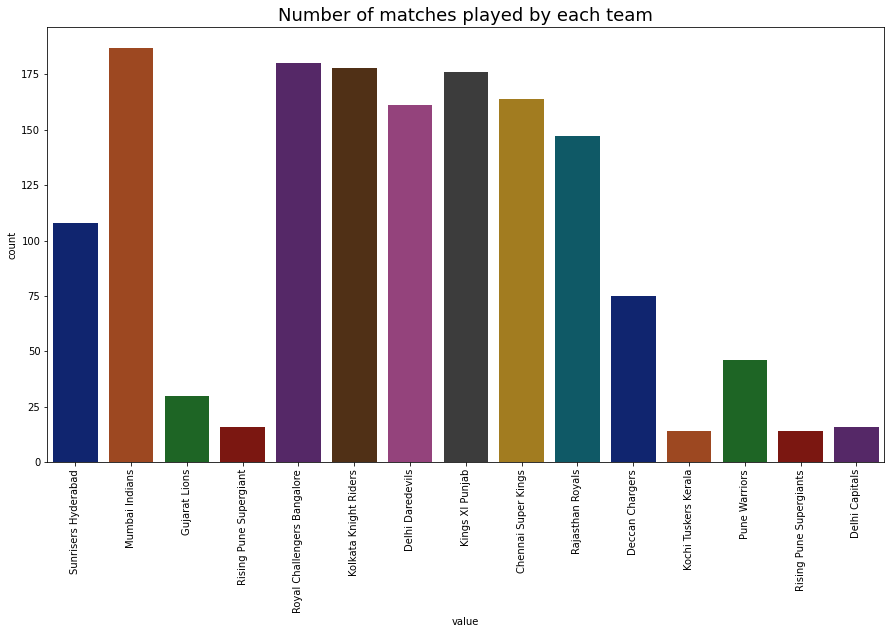

In [13]:
temp_df = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(15,8))
sns.countplot(x='value', data=temp_df,palette = 'dark')
plt.xticks(rotation='vertical')
plt.title("Number of matches played by each team",fontsize=18)
plt.show()

Mumbai Indians has played the most number of matches followed by Royal Challengers Bangalore

**Team with the maximum number of wins**

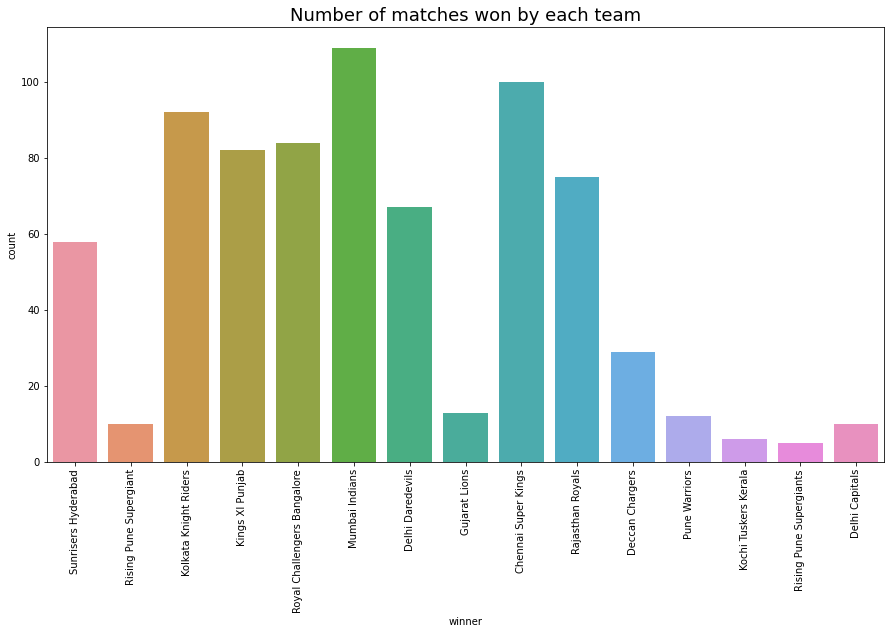

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='winner', data=matches)
plt.title("Number of matches won by each team",fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Mumbai Indians has the highest number of wins followed by Chennai Super Kings followed closely by Kolkata Knight Riders

**Winner Teams each season**

In [15]:
winning_teams = matches[['season','winner']]

In [16]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

In [17]:
winners_of_IPL

,team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text major ticklabel objects>)

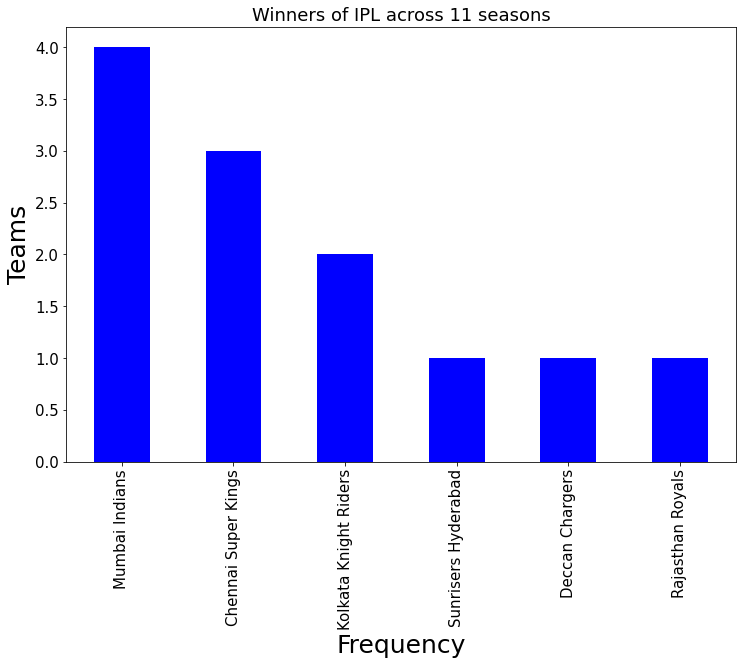

In [109]:
winners_of_IPL['team'].value_counts().plot(kind = 'bar', figsize = (12,8), color = 'blue')
plt.title("Winners of IPL across 11 seasons",fontsize=18)
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

The team of Mumbai Indians has won the IPL season most number of times (4)  followed by Chennai Super Kings(3)

**Toss Decision**

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

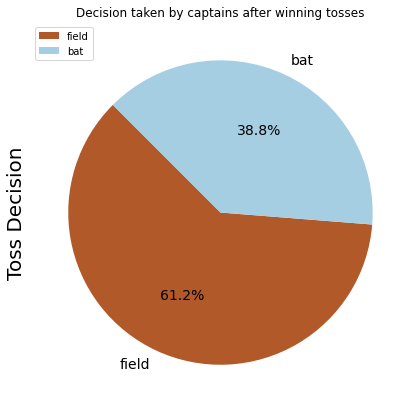

In [19]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%',  figsize=(10,7), startangle=135, legend=True, cmap='Paired_r')
plt.ylabel('Toss Decision',fontsize= 20)
plt.title('Decision taken by captains after winning tosses')

Choosing to field first is the majority choice

**Individual teams decision to choose bat or field after winning toss**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

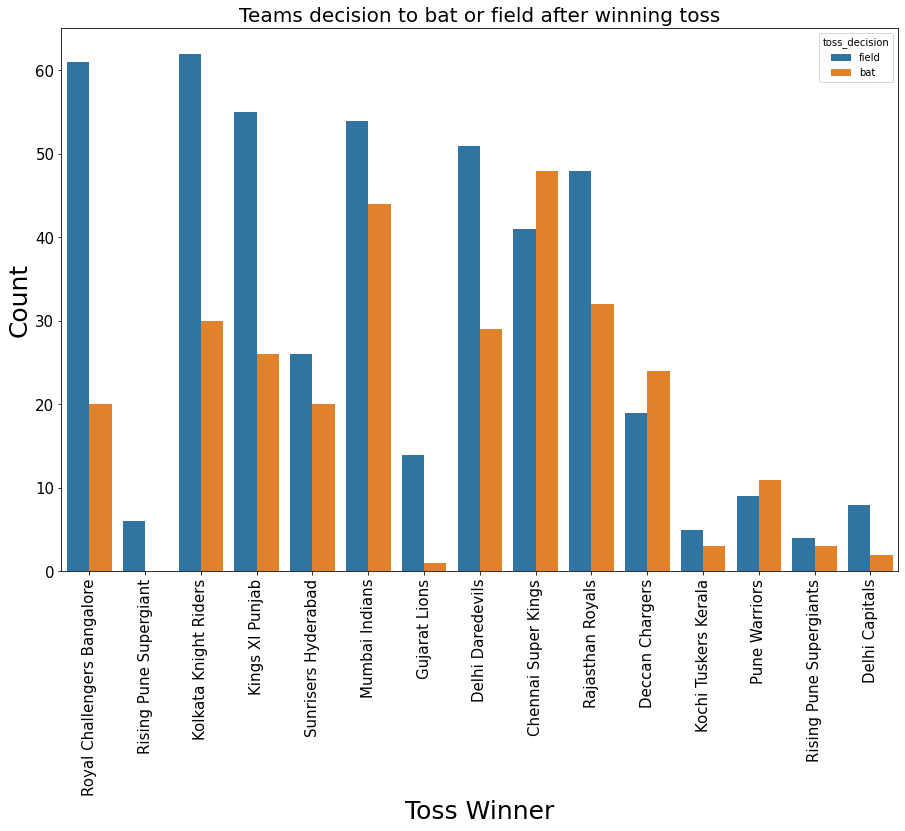

In [107]:
plt.figure(figsize = (15,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat or field after winning toss", size = 20)
plt.xticks(rotation='vertical',size = 15)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 25)
plt.ylabel("Count", size = 25)

All teams,except for a few like Chennai Super Kings,Pune warriors and Deccan Chargers,decided to choose fielding over batting first on winning toss

**Effect of toss decision on winning**

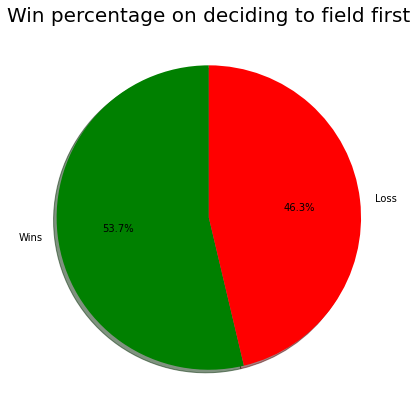

In [21]:
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['green', 'red']
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage on deciding to field first",fontsize=20)
plt.show()

Percentage of winning matches by deciding to field first is more

**Toss Decision through the years**

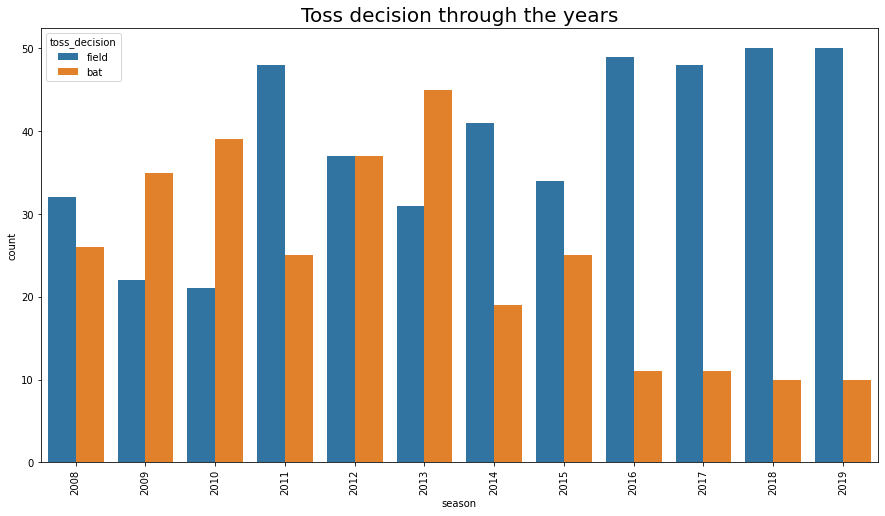

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.title('Toss decision through the years',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

We can see that the toss decision is more inclined towards fielding,especially in the last few years

**Luck of Toss winning teams**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


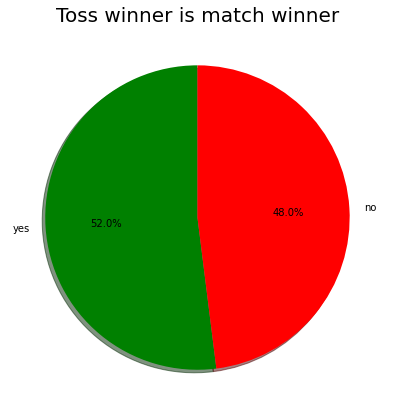

In [23]:
matches['toss_winner_is_winner'] = 'no'
matches['toss_winner_is_winner'].iloc[matches.toss_winner == matches.winner] = 'yes'
temp_series = matches.toss_winner_is_winner.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['green', 'red']
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner",fontsize=20)
plt.show()

Percentage of toss winners winning the match is higher

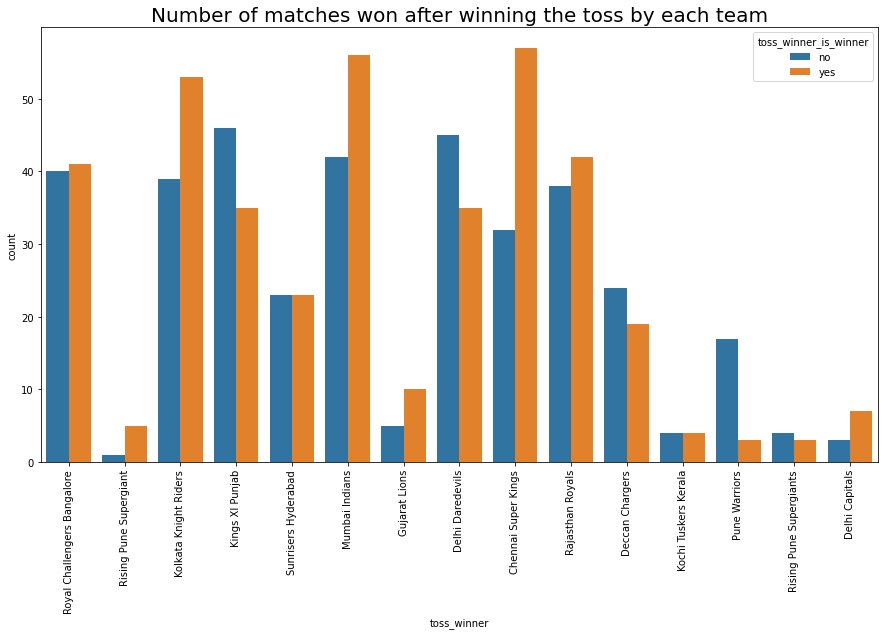

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=matches)
plt.xticks(rotation='vertical')
plt.title("Number of matches won after winning the toss by each team",fontsize=20)
plt.show()

It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.

On the other hand, Pune Warriors end up losing the matches more often when they won the toss.

**Top Players of the match**

Text(0.5, 0, 'Players')

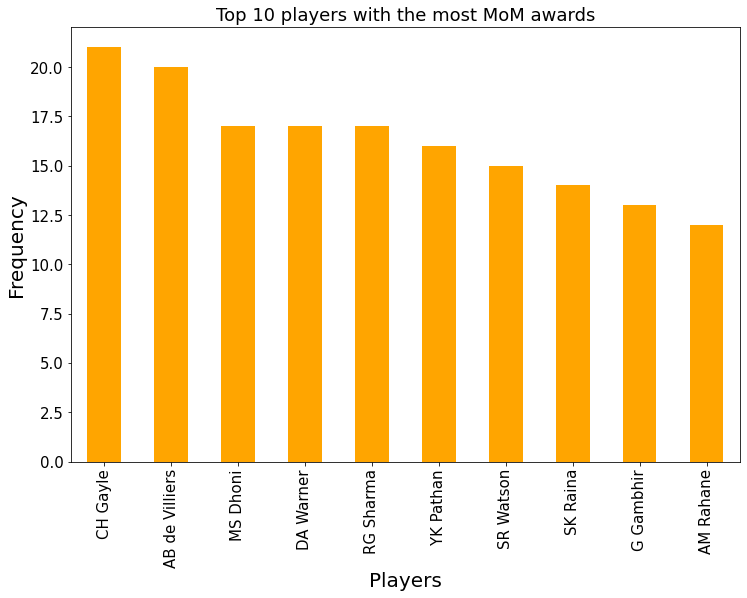

In [25]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='orange')
plt.title("Top 10 players with the most MoM awards",fontsize=18)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Players", size = 20)

Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.

**Batsman Analysis**

In [60]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

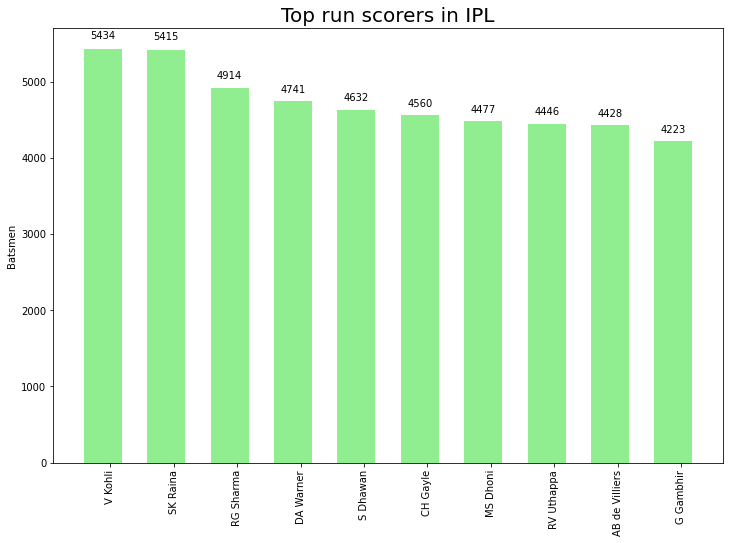

In [76]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightgreen')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_ylabel("Batsmen")
ax.set_title("Top run scorers in IPL",fontsize=20)
autolabel(rects)
plt.show()

Virat Kohli is the highest run scorer,followed by SK Raina

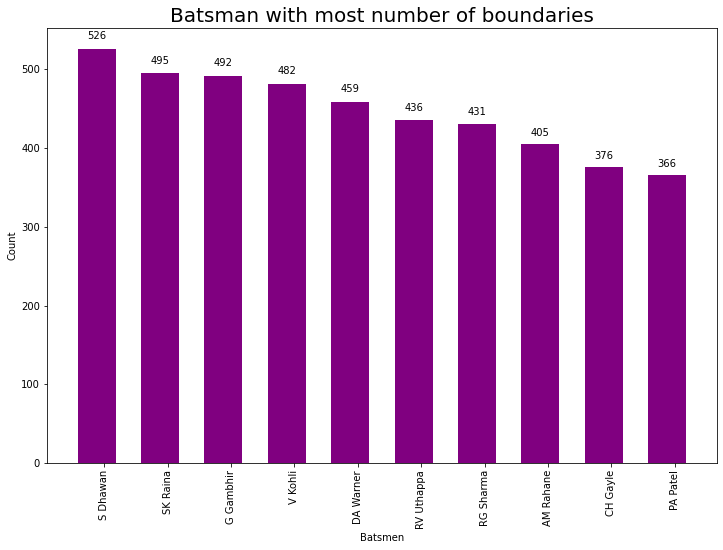

In [75]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='purple')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Batsmen")
ax.set_title("Batsman with most number of boundaries",fontsize=20)
autolabel(rects)
plt.show()

S Dhawan has had the highest number of boundaries followed by SK Raina

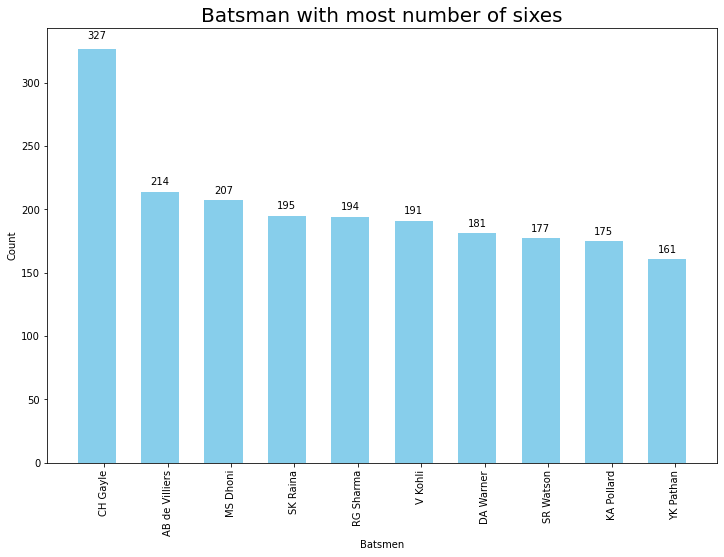

In [74]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='skyblue')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Batsmen")
ax.set_title("Batsman with most number of sixes",fontsize=20)
autolabel(rects)
plt.show()

CH Gayle has scored the most number of sixes, followed by AB de Villers

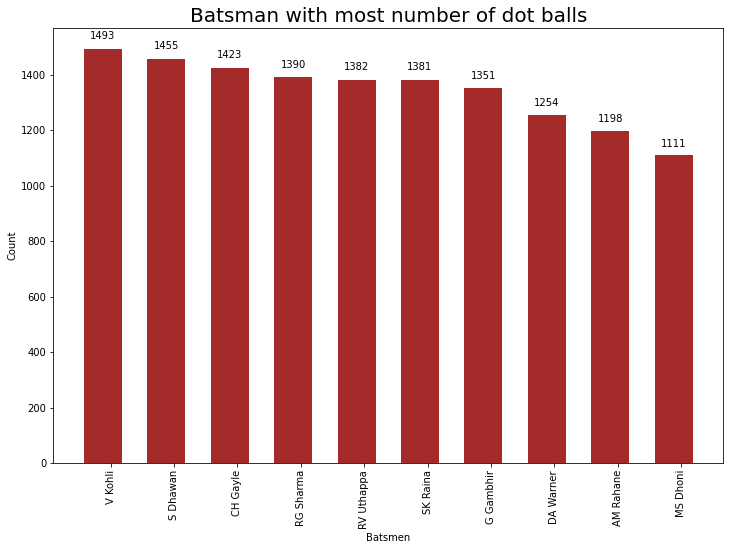

In [80]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='brown')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Batsmen")
ax.set_title("Batsman with most number of dot balls",fontsize=20)
autolabel(rects)
plt.show()

V Kohli has played the highest number of dot balls, followed by S Dhawan

*Same names are being repeated.Since these guys have played more number of balls, they have more dot balls as well*

**Bowler Analysis**

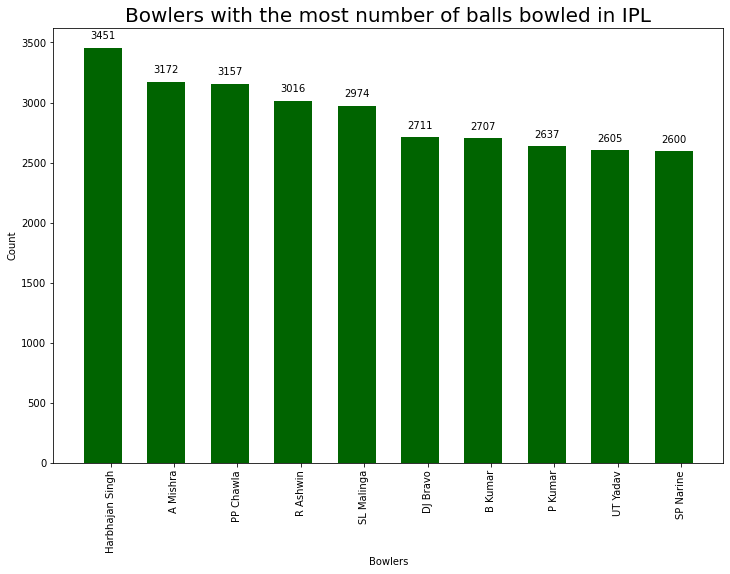

In [87]:
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='darkgreen')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Bowlers")
ax.set_title("Bowlers with the most number of balls bowled in IPL",fontsize=20)
autolabel(rects)
plt.show()

Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches

In [88]:
merge = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

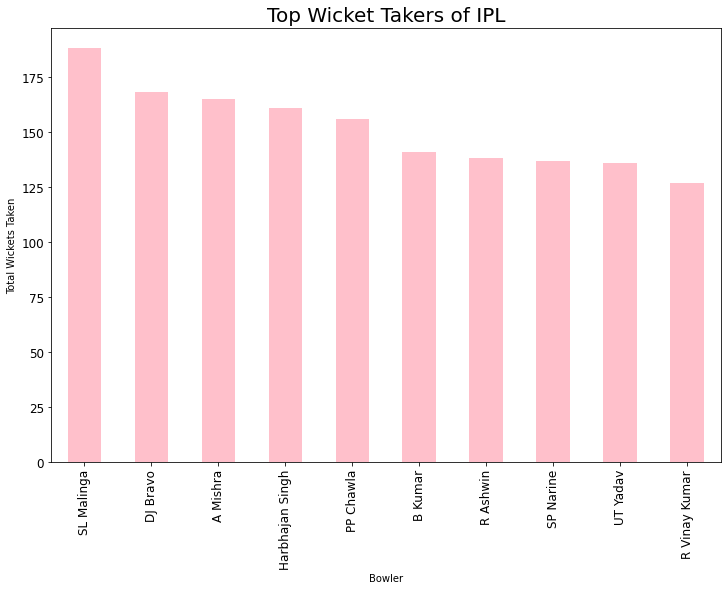

In [102]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'pink', figsize = (12,8))
plt.title("Top Wicket Takers of IPL", fontsize = 20)
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")
plt.xticks(size = 12)
plt.yticks(size = 12)

Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra

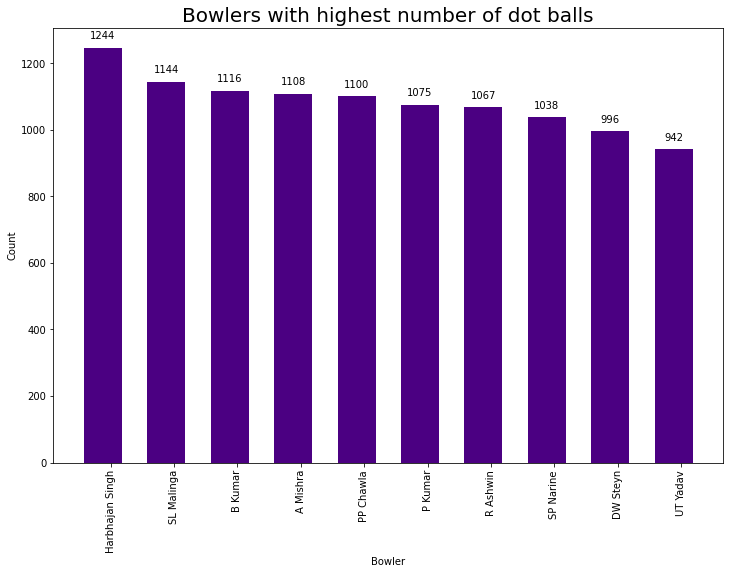

In [100]:
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]


labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='indigo')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Bowler")
ax.set_title("Bowlers with highest number of dot balls",fontsize=20)
autolabel(rects)
plt.show()

Harbhajan Singh has bowled the most number of dot balls,followed by SL Malinga

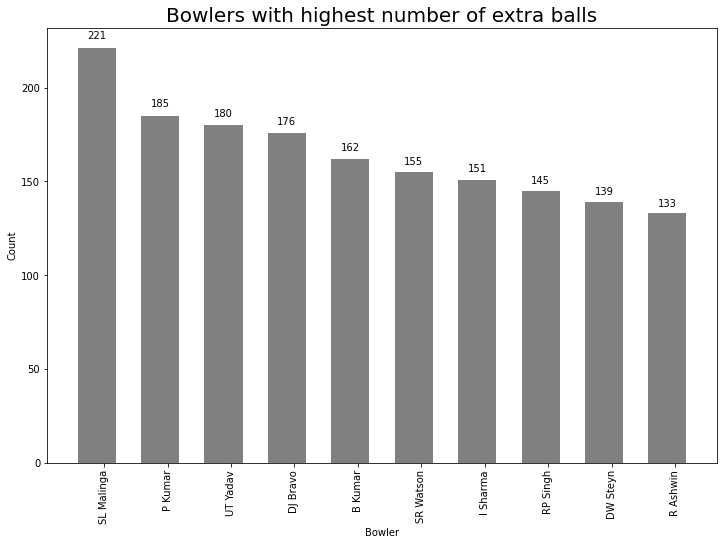

In [106]:
temp_df = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='grey')
ax.set_xticks(ind+((width)/5))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_xlabel("Bowler")
ax.set_title("Bowlers with highest number of extra balls",fontsize=20)
autolabel(rects)
plt.show()

Percentage of toss winners winning the match is higher

It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.

On the other hand, Pune Warriors end up losing the matches more often when they won the toss.

### **CONCLUSION** : 

**The most successful teams, players & factors contributing win or loss of a team:**
1.  **Mumbai Indians** has played the most number of matches followed by **Royal Challengers Bangalore**
2. **Mumbai Indians has won the IPL season most number of times** (4) followed by Chennai Super Kings(3)
3. **Chris Gayle has so far won the most number of MoM awards** followed by AB de Villiers.
4. **Virat Kohli is the highest run scorer**,followed by SK Raina
5. **S Dhawan has had the highest number of boundaries** followed by SK Raina
6. **CH Gayle has scored the most number of sixes**, followed by AB de Villers (highest strike rates)
7. **Harbhajan Singh has bowled the most number of balls** in IPL matches
8. **SL Malinga has taken the most number of wickets in IPL** followed by Bravo and Amit Mishra
9. **Harbhajan Singh has bowled the most number of dot balls** followed by SL Malinga
10. **SL Malinga has the most number of extra balls** followed by P Kumar
11. On winning the toss,the number of times teams have chosen to **field first **is greater than chosing to bat first
12. Chances of winning matches by deciding to field first is more too which is why we can see that the **toss decision is more inclined towards fielding**,especially in the last few years
13. **Percentage of toss winners winning the match is higher**(It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.On the other hand, Pune Warriors end up losing the matches more often when they won the toss.)


 **Teams or Players a company should endorse for its products:**
1. If the company is looking for the best performing team,they should endorse Mumbai Indians and Chennai Super Kings
1. If the company is looking for a consistant batsman who needs to score good amount of runs then endorse batsmen like V Kohli, S Raina, Rohit Sharma , David Warner
2. If the company is looking for a game changing batsman then endorse Chris Gayle, AB deVillers, R Sharma , MS Dhoni
3. If the company is looking for a batsman who could score good amount of runs every match then endorse  DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
4. If the company needs an experienced bowler then endorse Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
5. If the company needs a wicket taking bowler then endorse go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
6. If the company needs a bowler bowling most number of dot balls then endorse Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla